Use the *bayesian* method to estimate a white dwarf age 
=============================================

In this tutorial we are going to estimate the ages of two white dwarfs using the bayesian method. We are going to start by importing all the packages we are going to need

In [1]:
import wdwarfdate  
import numpy as np
import time

We are going to set up the white dwarfs's effective temperatures and surface gravity obtained from Gentile Fusillo, N.P. et al. (2019).

In [2]:
#Define data for the white dwarf
teffs = np.array([19250,20250])
teffs_err = np.array([500,850])
loggs = np.array([8.16,8.526])
loggs_err = np.array([0.084,0.126])

Now we run the age estimation using the *bayesian* method and take the time it takes to run. We are going to explicitly indicate the models we wanted to use:

1) `model_wd = 'DA'`, for type of white dwarf

2) `model_ifmr = 'Cummings_2018_MIST'`, for the initial-to-final mass relation 

3) `feh = 'p0.00'` and `vvcrit='0.0'`, for the isochrone of the progenitor star

These are the default models so we do not need to do it in this case, but we will write them down to be clear. 
We will also specify the high and low percentiles we want to use to calculate the errors for each parameter. With the `data_type = 'Gyr'` parameters we will select the units of the resulting ages to be Gyr. Finally we will select `plot = True` so we obtain the plots from the MCMC run and the distributions for each of the resulting parameters. We strongly recommend running the *bayesian* method with `plot = True` to be able to check that the run converged.

Running teff:19250 logg:8.16


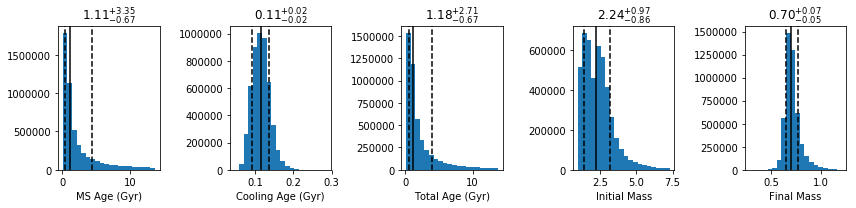

Running teff:20250 logg:8.526


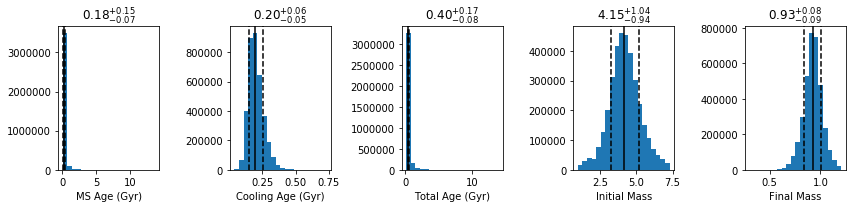

11841.575164318085s


In [4]:
start = time.time()
results = wdwarfdate.calc_wd_age(teffs,teffs_err,loggs,loggs_err,
                                 method='bayesian',
                                 model_wd='DA',feh='p0.00',vvcrit='0.0',
                                 model_ifmr = 'Cummings_2018_MIST', 
                                 high_perc = 84, low_perc = 16,
                                 datatype='Gyr',
                                 plot=True)
end = time.time()
print('{}s'.format(end - start))

In [8]:
'time: {}hs'.format(11841.575164318085/60/60)

'time: 3.2893264345328013hs'

The *bayesian* method takes a significan time to run, specially because is running to calculate the autocorrelation time ($\tau _c$) and then running $1000\times \tau _c$ steps, to assure at least 1000 indenpenden samples. To make the *bayesian* method take less time we could modify the burning steps, the steps to calculate the autocorrelation or the number of independent samples. These are the default values respectively: `nburn_in = 1000`, `n_calc_auto_corr = 10000`, `n_indep_samples = 1000`. Making any of these numbers smaller will make the run faster. However we do not recommend to make them smaller because it might affect the precision of the results. **To have a first approximation to the results we recommend using the *freq* method which is extremelly fast, and once you are ok with the results, run the *bayesian* method to estimate errors.**

The option `plot = True` will save several files to a folder called 'results', or any path we choose using the `path` parameter that we did not explicitated in our example. Below we describe each of he files the *bayesian* method creates: 

1) "results/teff_20250_logg_8.526_feh_p0.00_vvcrit_0.0_DA_Cummings_2018_MIST_corner_plot.png": corner plot for the three variables the code samples: main sequence age, cooling age and delta m.

<img src="results/teff_20250_logg_8.526_feh_p0.00_vvcrit_0.0_DA_Cummings_2018_MIST_corner_plot.png">

2) "results/teff_20250_logg_8.526_feh_p0.00_vvcrit_0.0_DA_Cummings_2018_MIST_corr_time.png": result of the autocorrelation time as explained in the [tutorial](https://emcee.readthedocs.io/en/stable/tutorials/autocorr/) by Dan Foreman-Mackey.

<img src="results/teff_20250_logg_8.526_feh_p0.00_vvcrit_0.0_DA_Cummings_2018_MIST_corr_time.png">

3) "results/teff_20250_logg_8.526_feh_p0.00_vvcrit_0.0_DA_Cummings_2018_MIST_distributions.png": distribution of all the parameter of the white dwarf: the sampled parameters (main sequence and cooling age) and the likelihood evaluations for the dependent parameters (final mass, initial mass and total age). We have those figures above.

4) "results/teff_20250_logg_8.526_feh_p0.00_vvcrit_0.0_DA_Cummings_2018_MIST_walkers.png": traces for each walker to confirm convergence of the code.

<img src="results/teff_20250_logg_8.526_feh_p0.00_vvcrit_0.0_DA_Cummings_2018_MIST_walkers.png">

4) "results/teff_19250_logg_8.16_feh_p0.00_vvcrit_0.0_DA_Cummings_2018_MIST.txt": Contains the likelihood evaluations in each step of the MCMC for all the parameters we are interested in. We mentioned that the run of the MCMC is done in three stages: burn in, calculation of autocorrelation time and 1000 autocorrelation time steps. This file contains the likelihood evaluations of the last stage only. These are the columns: 'ln_ms_age', 'ln_cooling_age', 'ln_total_age, 'initial_mass' and 'final_mass'.